# CSMAD21 - Applied Data Science with Python - Practical 9

## Regression

In this practical you will first learn to implement regression from scratch using the ordinary least squares method. The next objective of the practical is to implement a similar problem using the scikit learn API. The final objective will be to use data science methodology on several sources of data to make predictions and using regularisation to improve the fit of the models.

### Using data science methodology to build robust regression models

In this section we will use data science methodology to build regression models on datasets that can be used to build robust models to make predictions

### A. The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service from 1970 concerning housing in the area of Boston MA. The following describes the dataset columns:

1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS proportion of non-retail business acres per town
4. CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX nitric oxides concentration (parts per 10 million)
6. RM average number of rooms per dwelling
7. AGE proportion of owner-occupied units built prior to 1940
8. DIS weighted distances to five Boston employment centres
9. RAD index of accessibility to radial highways
10. TAX full-value property-tax rate per 10,000usd
11. PTRATIO pupil-teacher ratio by town
13. LSTAT % lower income status of the population 
14. MEDV - Median value of owner-occupied homes in 1000 dollars

The goal in this dataset is to predict the median value of a property in the boston area. 

1. Start By importing the appropirate package: pandas, numpy, matplotlib, seaborn and appropriate scikit learn packages.
2. Read the dataset by using pandas, retrieve some simple statistics, the datatypes for the columns, if there are any missing values
3. Establish whether there is any correlation between the target variable and the independent variable
4. Arrange the data into a features matrix and a target variable
5. Split the data into training and test holdout datasets
6. Choose a class of model (linear regression)
7. Fit the model to the data.
8. Check the robustness of the model through cross validation

References: 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

9. Make Predictions on the test holdout data using the appropriate evaluation metrics
10. Repeat the model building steps using penalised regression methods, use different alpha coefficients to look at how the fit is effected

In [1]:
#Import Packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
#reading in the data the data has no header and will need new column names

b_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2


In [4]:
#Exploratory data analysis
b_housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [11]:
#Check the datatype of the feature variables


CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

In [12]:
# Check for any missing values


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

Text(0.5, 1.0, 'longley correlations')

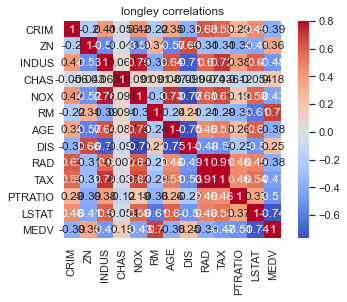

In [22]:
#Build plot to establish any correlation between independent variables


C:\Users\Miguel\anaconda3\envs\base2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

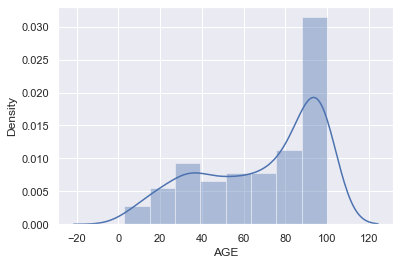

In [23]:
#Establish any univariate distributions within the features (optional) 


In [57]:
# Splitting target variable and independent variables


In [58]:
# Splitting to training and testing data


Train dataset total record:  404
Train dataset total attributes:  12
Test dataset total record:  102


In [119]:
# Create a Linear regressor
from sklearn.linear_model import LinearRegression


Coefficients: 
 [-1.27195928e-01  3.07954889e-02  2.52477064e-02  3.04947682e+00
 -1.81832461e+01  4.24009781e+00 -3.59439826e-03 -1.46550703e+00
  2.39990397e-01 -1.12752436e-02 -8.94844726e-01 -5.37770202e-01]


In [120]:
#Converting the coefficient values to a dataframe (optional)


,Attribute,Coefficient
0,CRIM,-0.127196
1,ZN,0.030795
2,INDUS,0.025248
3,CHAS,3.049477
4,NOX,-18.183246
5,RM,4.240098
6,AGE,-0.003594
7,DIS,-1.465507
8,RAD,0.239990
9,TAX,-0.011275


In [121]:
from sklearn.metrics import mean_squared_error, r2_score


Mean squared error: 22.78
Root Mean squared error: 4.77
Coefficient of determination: 0.69


In [122]:
print('Actual values: ',  y_test[0:10].tolist())
print('Predicted Values: ',y_pred[0:10].tolist())

Actual values:  [23.6, 32.4, 13.6, 22.8, 16.1, 20.0, 17.8, 14.0, 19.6, 16.8]
Predicted Values:  [28.958214951582008, 36.28754087345669, 14.098835709483946, 25.03314354180838, 17.60196805941295, 23.294367641030227, 17.414977721241478, 13.688915802490815, 22.03729907930316, 20.30090287060578]


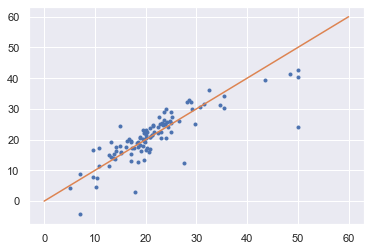

In [126]:
#Multiple dimensional data is difficult to visualise but you can check the fit on a 2D visualisation 
# plot prediction and actual data

# plot a line, a perfit predict would all fall on this line


We can make sure our model is more robust by using cross validation to make sure that the sampling of the training/ test holdout is not increasing the bias of the predictions made by the trained model, for cross validation you need to specify a scoring method as a parameter

In [115]:
# k-fold CV (using all the 12 variables)
from sklearn.model_selection import cross_validate


{'fit_time': array([0.00294566, 0.00199389, 0.00199461, 0.00199437, 0.00299191,
        0.00201249, 0.00199437, 0.00199437, 0.00199485, 0.00199485]),
 'score_time': array([0.00190806, 0.00199461, 0.00199461, 0.00199461, 0.00199437,
        0.00297475, 0.00099754, 0.00199485, 0.00099683, 0.00199485]),
 'test_neg_mean_squared_error': array([  -9.25878679,  -14.33627972,  -16.56770314,  -36.7539769 ,
         -32.80665966,  -20.49149059,   -9.75380908, -151.48420232,
         -37.27476042,  -11.33741457]),
 'test_neg_root_mean_squared_error': array([ -3.04282546,  -3.786328  ,  -4.07034435,  -6.06250583,
         -5.72770981,  -4.52675276,  -3.12310888, -12.30789187,
         -6.10530592,  -3.36710774]),
 'test_r2': array([ 0.73456811,  0.4661841 , -1.36186969,  0.62537091,  0.53458695,
         0.72769055,  0.39037535, -0.01594459, -0.97774976,  0.39895697])}

In [116]:
# Model predictions on previously unseen test data using the approriate evaluation metrics



Mean squared error: 34.01
Mean squared error: 5.21
Mean squared error: 0.15


Lets see whether we can improve the model through the use of penalised regression models

In [127]:
#import extra packages for Ridge regression 
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [152]:
# Create a Ridge regressor


# Train the model using the training sets 

# 3. Check the score


array([-1.23508117e-01,  3.30861055e-02, -9.81507529e-03,  2.79853679e+00,
       -1.00936639e+01,  4.26665675e+00, -9.79339381e-03, -1.35032270e+00,
        2.25012488e-01, -1.21663210e-02, -8.02287177e-01, -5.54399383e-01])

In [153]:
#Converting the coefficient values to a dataframe (optional)


,Attribute,Coefficient
0,CRIM,-0.123508
1,ZN,0.033086
2,INDUS,-0.009815
3,CHAS,2.798537
4,NOX,-10.093664
5,RM,4.266657
6,AGE,-0.009793
7,DIS,-1.350323
8,RAD,0.225012
9,TAX,-0.012166


In [144]:
# Model predictions on previously unseen test data using the approriate evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score


Mean squared error: 23.01
Root Mean squared error: 4.80
Coefficient of determination: 0.69


In [ ]:
# k-fold CV (using all the 12 variables)
#Evaluate the model
from sklearn.model_selection import cross_validate


Now lets try LASSO

In [150]:
#Import Lasso regression
from sklearn.linear_model import Lasso


Lasso(alpha=1)

In [151]:
#Converting the coefficient values to a dataframe (optional)


,Attribute,Coefficient
0,CRIM,-0.089198
1,ZN,0.030044
2,INDUS,-0.000000
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,1.478252
6,AGE,0.017925
7,DIS,-0.622046
8,RAD,0.203085
9,TAX,-0.013487


In [155]:
from sklearn.metrics import mean_squared_error, r2_score


Mean squared error: 23.33
Root Mean squared error: 4.83
Coefficient of determination: 0.68


In [157]:
# k-fold CV (using all the 12 variables)
from sklearn.model_selection import cross_validate


Mean squared error: 35.52
Root Mean squared error: 5.57
Coefficient of determination: 0.14


### B. Extra Challenges

#### 1. AirBnB2020 data

Now lets look at a modern real world dataset, this is the airbnb dataset from US listings in 2020. Some of the challenges  based on the data to work out are:

    Can we predict the price of each house in different regions?
    Can we describe a region using the names of listings in that region?
    What can we learn about different regions from the data?
    Based on different factors is it possible to recommend a title to the host for his/her listing?
    Can we estimate the popularity of a listing based on given features?
    
Although this dataset is based on the US listings we can gather different data for different cities and US regions ound on Inside Airbnb.


#### 2. Predicting Bicycle Traffic

In this challenge we will try to predict the number of bicycle trips in a year and correlate the data with weather station data in order to predict the number of bikes required for specific times of year.